In [1]:
import pandas as pd

df = pd.read_csv("../data/demand_history.csv", parse_dates=["date"])
df.head()

,date,sku,units_sold
0,2024-01-01,USB_C_CABLE,34
1,2024-01-02,USB_C_CABLE,42
2,2024-01-03,USB_C_CABLE,56
3,2024-01-04,USB_C_CABLE,41
4,2024-01-05,USB_C_CABLE,54


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1830 non-null   datetime64[ns]
 1   sku         1830 non-null   object        
 2   units_sold  1830 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 43.0+ KB


In [5]:
df["units_sold"].describe()

count    1830.000000
mean       46.392350
std        13.080737
min        19.000000
25%        37.000000
50%        45.000000
75%        55.000000
max       104.000000
Name: units_sold, dtype: float64

In [6]:
sku_summary = (
    df.groupby("sku")["units_sold"]
    .agg(["sum", "mean", "std"])
    .sort_values("sum", ascending=False)
)

sku_summary.head(10)


,sum,mean,std
sku,,,
WIRELESS_MOUSE,20827,56.904372,11.856869
USB_C_CABLE,20192,55.169399,10.555204
HEADPHONES,16603,45.363388,9.390270
LAPTOP_STAND,15431,42.161202,8.275312
PHONE_CHARGER,11845,32.363388,6.658123


In [8]:
daily_demand = (
    df.groupby("date")["units_sold"]
    .sum()
    .reset_index()
)

daily_demand.head()

,date,units_sold
0,2024-01-01,185
1,2024-01-02,187
2,2024-01-03,211
3,2024-01-04,177
4,2024-01-05,191


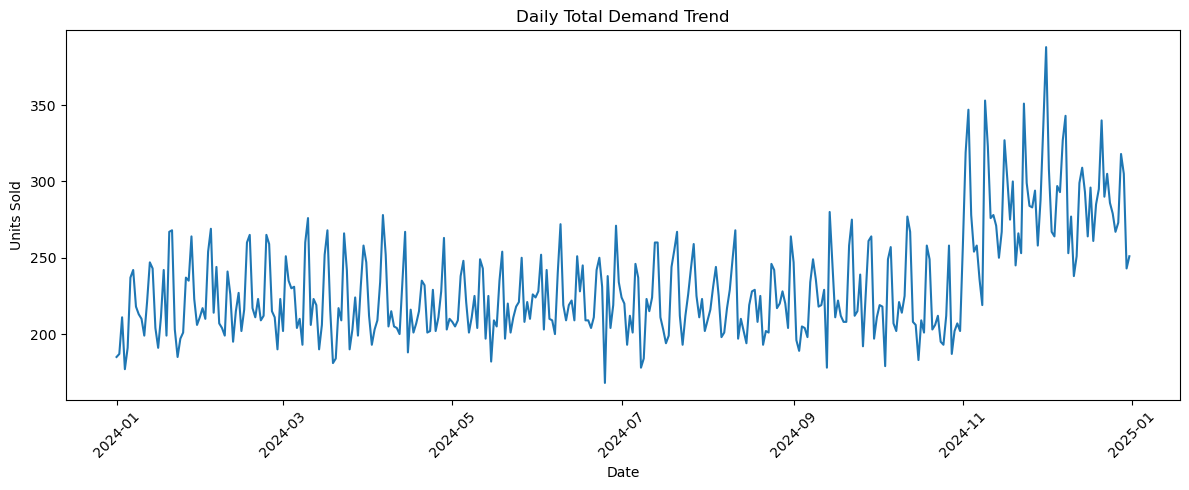

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(daily_demand["date"], daily_demand["units_sold"])
plt.title("Daily Total Demand Trend")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
daily_demand["7_day_avg"] = daily_demand["units_sold"].rolling(7).mean()
daily_demand["14_day_avg"] = daily_demand["units_sold"].rolling(14).mean()

daily_demand.tail()

,date,units_sold,7_day_avg,14_day_avg
361,2024-12-27,273,291.428571,288.785714
362,2024-12-28,318,288.285714,289.428571
363,2024-12-29,305,290.428571,290.285714
364,2024-12-30,243,281.571429,288.785714
365,2024-12-31,251,276.571429,285.571429


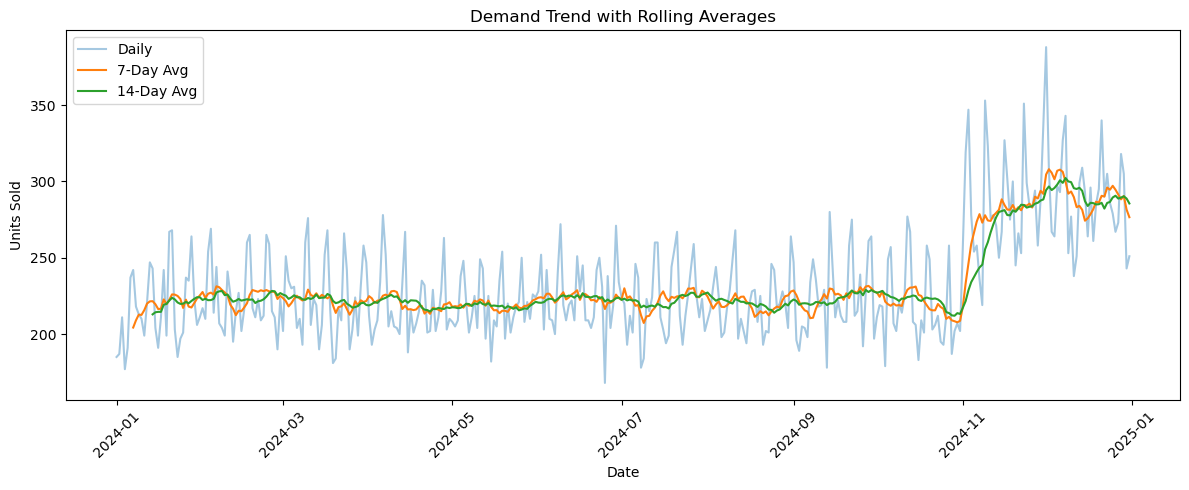

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(daily_demand["date"], daily_demand["units_sold"], alpha=0.4, label="Daily")
plt.plot(daily_demand["date"], daily_demand["7_day_avg"], label="7-Day Avg")
plt.plot(daily_demand["date"], daily_demand["14_day_avg"], label="14-Day Avg")

plt.title("Demand Trend with Rolling Averages")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()